# Random Walk project: Protein Phase Separation

In [1]:
# Import required packages

import numpy as np
import pandas as pd
import scipy
from scipy import stats as st
# from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##  Inducing cluster *dissociation* with transient spatial stimulus, applied to right side of grid, results in persistent spatial asymmetry after stimulus is removed 

Figure 6 in "Replicating a Phase Separation Model of Long Term Spatial Memory"

In [2]:
df_left = pd.read_csv('clusteravgsP2/clusteringAvgsleft.csv')
df_right = pd.read_csv('clusteravgsP2/clusteringAvgsright.csv')

In [3]:
df_left.columns = ['step', 'cluster size']
df_right.columns = ['step', 'cluster size']
df_left_abr = np.zeros((60,2))
df_right_abr = np.zeros((60,2))
k=0
for i in range(0,len(df_left),100000):
    df_left_abr[k,:] = [df_left['step'].values[i],df_left['cluster size'].values[i]]
    k=k+1
j=0
for i in range(0,len(df_right),100000):
    df_right_abr[j,:] = [df_right['step'].values[i],df_right['cluster size'].values[i]]
    j=j+1

In [4]:
df_left = pd.DataFrame({'step': df_left_abr[:,0], 'cluster size': df_left_abr[:,1]})
df_right = pd.DataFrame({'step': df_right_abr[:,0], 'cluster size': df_right_abr[:,1]})                     

In [5]:
#df_left.columns = ['step', 'cluster size']
#df_right.columns = ['step', 'cluster size']
region_st = np.array(['stimulated']*60)
region_unst = np.array(['unstimulated']*60)
region = np.concatenate((region_st,region_unst))
cluster_size_l = df_left['cluster size'].values
cluster_size_r = df_right['cluster size'].values
cluster_size = np.concatenate((cluster_size_l,cluster_size_r))
step_left = df_left['step'].values
step_right = df_right['step'].values
step = np.concatenate((step_left,step_right))

In [6]:
df_persistent = pd.DataFrame({'step': step, 'cluster size': cluster_size,'region': region})

<Figure size 1440x720 with 0 Axes>

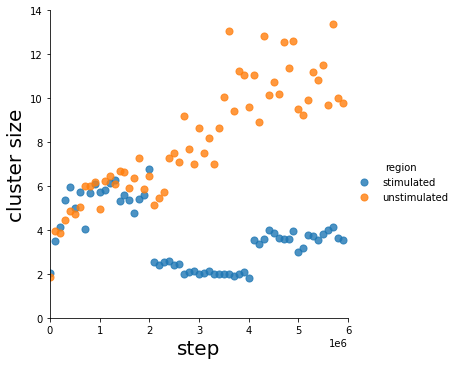

In [7]:
plt.figure(figsize=(20,10))
#plt.figure()
sns.lmplot(x='step', y='cluster size', hue='region', data=df_persistent, fit_reg=False,scatter_kws={'s':50})
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=20)
plt.gca().set_ylim((0,14))
plt.gca().set_xlim((0,6000000))
plt.gca().set_ylabel('cluster size', fontsize=20)
plt.gca().set_xlabel('step',fontsize=20)
plt.show()

Difference in mean cluster size for stimulated and unstimulated regions shows that a transient spatial stimulus that induces cluster dissociation results in spatial asymmetry which remains after the stimulus is removed

## Inducing cluster *aggregation* with transient spatial stimulus, applied to right side of grid, does not result in persistent spatial asymmetry after stimulus is removed 

figure 8 in "Replicating a Phase Separation Model of Long Term Spatial Memory"

In [9]:
df_left = pd.read_csv('clusteravgsP3/clusteringAvgsleft.csv')
df_right = pd.read_csv('clusteravgsP3/clusteringAvgsright.csv')
df_left.columns = ['step', 'cluster size']
df_right.columns = ['step', 'cluster size']

In [10]:
df_left_abr = np.zeros((60,2))
df_right_abr = np.zeros((60,2))
k=0
for i in range(0,len(df_left),100000):
    df_left_abr[k,:] = [df_left['step'].values[i],df_left['cluster size'].values[i]]
    k=k+1
j=0
for i in range(0,len(df_right),100000):
    df_right_abr[j,:] = [df_right['step'].values[i],df_right['cluster size'].values[i]]
    j=j+1
    

In [11]:
df_left = pd.DataFrame({'step': df_left_abr[:,0], 'cluster size': df_left_abr[:,1]})
df_right = pd.DataFrame({'step': df_right_abr[:,0], 'cluster size': df_right_abr[:,1]})   
region_st = np.array(['stimulated']*60)
region_unst = np.array(['unstimulated']*60)
region = np.concatenate((region_st,region_unst))
cluster_size_l = df_left['cluster size'].values
cluster_size_r = df_right['cluster size'].values
cluster_size = np.concatenate((cluster_size_l,cluster_size_r))
step_left = df_left['step'].values
step_right = df_right['step'].values
step = np.concatenate((step_left,step_right))

In [12]:
df_memoryless = pd.DataFrame({'step': step, 'cluster size': cluster_size,'region': region})

<Figure size 1440x720 with 0 Axes>

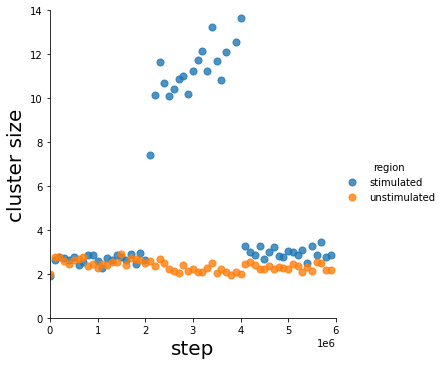

In [19]:
plt.figure(figsize=(20,10))
#plt.figure()
sns.lmplot(x='step', y='cluster size', hue='region', data=df_memoryless, fit_reg=False,scatter_kws={'s':50})
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=20)
plt.gca().set_ylim((0,14))
plt.gca().set_xlim((0,6000000))
plt.gca().set_ylabel('cluster size', fontsize=20)
plt.gca().set_xlabel('step',fontsize=20)
plt.show()

Transient spatial stimulus that induces cluster aggregation does not lead to spatial asymmetry. Mean cluster size converges after stimulus is removed.

## Verification that the simulation shows that phase separation is dependent on the interaction strength, i.e. temperature-like stimulus Θ

Figure 5 in "Replicating a Phase Separation Model of Long Term Spatial Memory"

Characteristic phase separation patterns as described by Dine et al. are “a single diffuse phase at high Θ, coexistence of dynamic, liquid-like droplets and a diffuse phase at intermediate values of Θ, and strongly arrested dynamics for low Θ.”

In [26]:
df_01 = pd.read_csv('clusteravgsP1/clusteringAvgs01.csv')
df_02 = pd.read_csv('clusteravgsP1/clusteringAvgs02.csv')
df_03 = pd.read_csv('clusteravgsP1/clusteringAvgs03.csv')
df_04 = pd.read_csv('clusteravgsP1/clusteringAvgs04.csv')
df_05 = pd.read_csv('clusteravgsP1/clusteringAvgs05.csv')
df_06 = pd.read_csv('clusteravgsP1/clusteringAvgs06.csv')
df_07 = pd.read_csv('clusteravgsP1/clusteringAvgs07.csv')
df_08 = pd.read_csv('clusteravgsP1/clusteringAvgs08.csv')
df_09 = pd.read_csv('clusteravgsP1/clusteringAvgs09.csv')
df_1 = pd.read_csv('clusteravgsP1/clusteringAvgs1.csv')
df_2 = pd.read_csv('clusteravgsP1/clusteringAvgs2.csv')
df_3 = pd.read_csv('clusteravgsP1/clusteringAvgs3.csv')
df_4 = pd.read_csv('clusteravgsP1/clusteringAvgs4.csv')
df_5 = pd.read_csv('clusteravgsP1/clusteringAvgs5.csv')
df_6 = pd.read_csv('clusteravgsP1/clusteringAvgs6.csv')
df_7 = pd.read_csv('clusteravgsP1/clusteringAvgs7.csv')
df_8 = pd.read_csv('clusteravgsP1/clusteringAvgs8.csv')
df_9 = pd.read_csv('clusteravgsP1/clusteringAvgs9.csv')
df_10 = pd.read_csv('clusteravgsP1/clusteringAvgs10.csv')

In [21]:
df_01.columns = ['step', 'cluster size']
df_02.columns = ['step', 'cluster size']
df_03.columns = ['step', 'cluster size']
df_04.columns = ['step', 'cluster size']
df_05.columns = ['step', 'cluster size']
df_06.columns = ['step', 'cluster size']
df_07.columns = ['step', 'cluster size']
df_08.columns = ['step', 'cluster size']
df_09.columns = ['step', 'cluster size']
df_1.columns = ['step', 'cluster size']
df_2.columns = ['step', 'cluster size']
df_3.columns = ['step', 'cluster size']
df_4.columns = ['step', 'cluster size']
df_5.columns = ['step', 'cluster size']
df_6.columns = ['step', 'cluster size']
df_7.columns = ['step', 'cluster size']
df_8.columns = ['step', 'cluster size']
df_9.columns = ['step', 'cluster size']
df_10.columns = ['step', 'cluster size']

In [22]:
mean_cluster_size = np.zeros((19,2))
mean_cluster_size[:,0]= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]


In [23]:
mean_cluster_size[0,1] = np.ndarray.max(df_01['cluster size'].values)
mean_cluster_size[1,1] = np.ndarray.max(df_02['cluster size'].values)
mean_cluster_size[2,1] = np.ndarray.max(df_03['cluster size'].values)
mean_cluster_size[3,1] = np.ndarray.max(df_04['cluster size'].values)
mean_cluster_size[4,1] = np.ndarray.max(df_05['cluster size'].values)
mean_cluster_size[5,1] = np.ndarray.max(df_06['cluster size'].values)
mean_cluster_size[6,1] = np.ndarray.max(df_07['cluster size'].values)
mean_cluster_size[7,1] = np.ndarray.max(df_08['cluster size'].values)
mean_cluster_size[8,1] = np.ndarray.max(df_09['cluster size'].values)
mean_cluster_size[9,1] = np.ndarray.max(df_1['cluster size'].values)
mean_cluster_size[10,1] = np.ndarray.max(df_2['cluster size'].values)
mean_cluster_size[11,1] = np.ndarray.max(df_3['cluster size'].values)
mean_cluster_size[12,1] = np.ndarray.max(df_4['cluster size'].values)
mean_cluster_size[13,1] = np.ndarray.max(df_5['cluster size'].values)
mean_cluster_size[14,1] = np.ndarray.max(df_6['cluster size'].values)
mean_cluster_size[15,1] = np.ndarray.max(df_7['cluster size'].values)
mean_cluster_size[16,1] = np.ndarray.max(df_8['cluster size'].values)
mean_cluster_size[17,1] = np.ndarray.max(df_9['cluster size'].values)
mean_cluster_size[18,1] = np.ndarray.max(df_10['cluster size'].values)
print(mean_cluster_size)


[[ 0.1    3.613]
 [ 0.2    4.685]
 [ 0.3    5.767]
 [ 0.4    6.124]
 [ 0.5    7.   ]
 [ 0.6    6.581]
 [ 0.7    5.974]
 [ 0.8    5.313]
 [ 0.9    5.216]
 [ 1.     5.022]
 [ 2.     2.819]
 [ 3.     2.628]
 [ 4.     2.407]
 [ 5.     2.453]
 [ 6.     2.346]
 [ 7.     2.269]
 [ 8.     2.262]
 [ 9.     2.237]
 [10.     2.248]]


In [24]:
df_temp = pd.DataFrame({'interaction strength': mean_cluster_size[:,0], 'max cluster size': mean_cluster_size[:,1]})

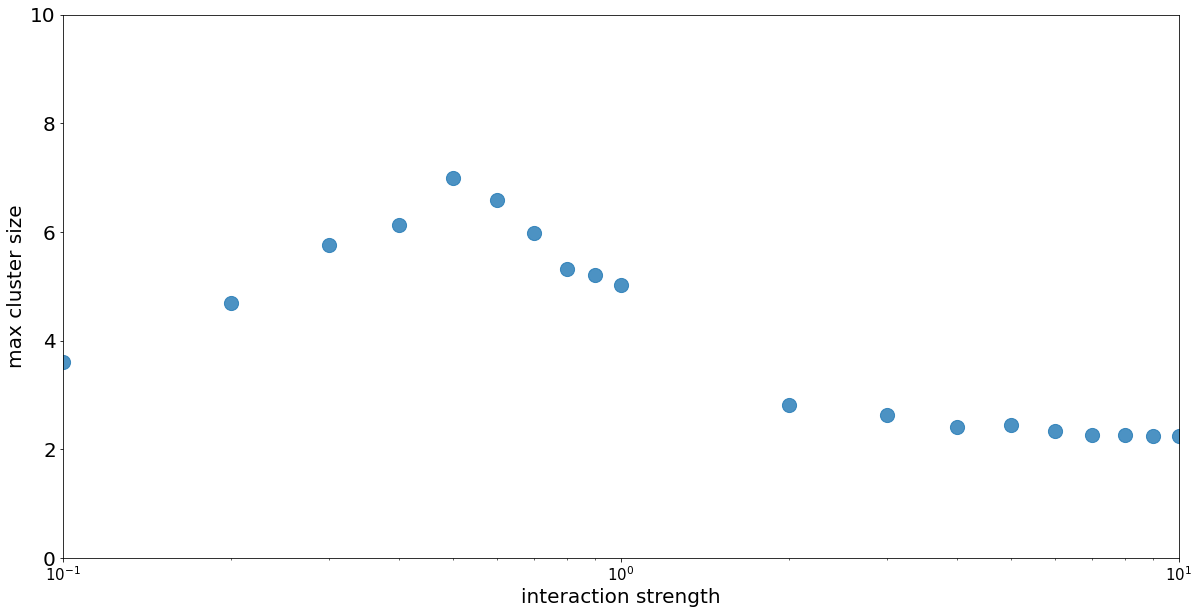

In [25]:
plt.figure(figsize=(20,10))
#plt.figure()
sns.regplot(x='interaction strength', y='max cluster size', data=df_temp, fit_reg=False,scatter_kws={'s':200})
plt.gca().set_xscale('log')
#plt.gca().set_xscale('log',basex = 10)
plt.gca().set_ylim((0,10))
plt.gca().set_xlim((.1,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.gca().set_ylabel('max cluster size', fontsize=20)
plt.gca().set_xlabel('interaction strength',fontsize=20)
plt.show()

Maximum mean cluster size as a function of temperature shows that phase separation is dependent on the interaction strength. At high temperature, the solution is mostly diffuse with a maximum cluster size of two. At intermediate temperatures, larger clusters form with varying sizes.